Paths found by different algorithms:
A* Path: [1, 3, 6]
Dijkstra's Path: [1, 3, 6]
BFS Path: [1, 3, 6]
DFS Path: [1, 3, 6]


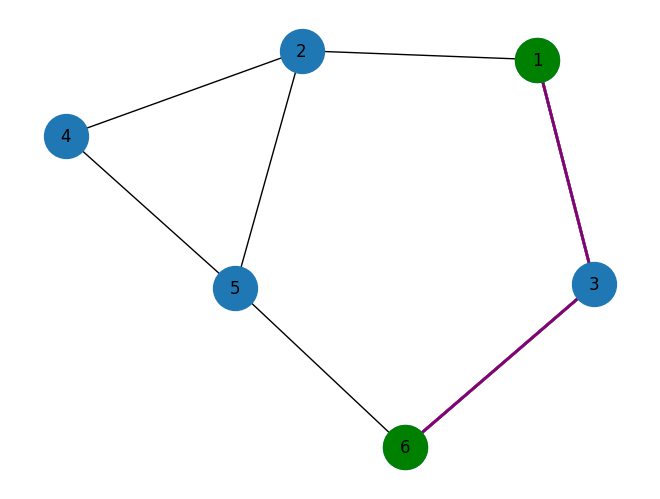

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from queue import PriorityQueue

# Create a sample graph
G = nx.Graph()
edges = [
    (1, 2, {'weight': 2}),
    (1, 3, {'weight': 4}),
    (2, 4, {'weight': 1}),
    (2, 5, {'weight': 3}),
    (3, 6, {'weight': 2}),
    (4, 5, {'weight': 2}),
    (5, 6, {'weight': 3}),
]
G.add_edges_from(edges)

# Define algorithms
def a_star(graph, start, goal):
    open_list = PriorityQueue()
    open_list.put((0, start))
    came_from = {}
    g_score = {node: float('inf') for node in graph.nodes}
    g_score[start] = 0

    while not open_list.empty():
        _, current = open_list.get()

        if current == goal:
            return reconstruct_path(came_from, current)

        for neighbor in graph.neighbors(current):
            tentative_g_score = g_score[current] + graph[current][neighbor]['weight']
            if tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score = g_score[neighbor] + heuristic(neighbor, goal)
                open_list.put((f_score, neighbor))

    return None

def reconstruct_path(came_from, current):
    path = [current]
    while current in came_from:
        current = came_from[current]
        path.append(current)
    path.reverse()
    return path

def heuristic(node, goal):
    return abs(node - goal)  # Simple heuristic for demonstration

def dijkstra(graph, start, goal):
    open_list = PriorityQueue()
    open_list.put((0, start))
    came_from = {}
    g_score = {node: float('inf') for node in graph.nodes}
    g_score[start] = 0

    while not open_list.empty():
        _, current = open_list.get()

        if current == goal:
            return reconstruct_path(came_from, current)

        for neighbor in graph.neighbors(current):
            tentative_g_score = g_score[current] + graph[current][neighbor]['weight']
            if tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                open_list.put((g_score[neighbor], neighbor))

    return None

def bfs(graph, start, goal):
    queue = [start]
    visited = set()
    came_from = {}

    while queue:
        current = queue.pop(0)

        if current == goal:
            return reconstruct_path(came_from, current)

        visited.add(current)

        for neighbor in graph.neighbors(current):
            if neighbor not in visited and neighbor not in queue:
                queue.append(neighbor)
                came_from[neighbor] = current

    return None

def dfs(graph, start, goal):
    stack = [start]
    visited = set()
    came_from = {}

    while stack:
        current = stack.pop()

        if current == goal:
            return reconstruct_path(came_from, current)

        visited.add(current)

        for neighbor in graph.neighbors(current):
            if neighbor not in visited and neighbor not in stack:
                stack.append(neighbor)
                came_from[neighbor] = current

    return None

# Define start and goal nodes
start_node = 1
goal_node = 6

# Run algorithms
a_star_path = a_star(G, start_node, goal_node)
dijkstra_path = dijkstra(G, start_node, goal_node)
bfs_path = bfs(G, start_node, goal_node)
dfs_path = dfs(G, start_node, goal_node)

print("Paths found by different algorithms:")
print("A* Path:", a_star_path)
print("Dijkstra's Path:", dijkstra_path)
print("BFS Path:", bfs_path)
print("DFS Path:", dfs_path)

# Visualize the graph and paths
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1000)
nx.draw_networkx_nodes(G, pos, nodelist=[start_node, goal_node], node_color='g', node_size=1000)
if a_star_path:
    nx.draw_networkx_edges(G, pos, edgelist=list(zip(a_star_path, a_star_path[1:])), edge_color='r', width=2)
if dijkstra_path:
    nx.draw_networkx_edges(G, pos, edgelist=list(zip(dijkstra_path, dijkstra_path[1:])), edge_color='b', width=2)
if bfs_path:
    nx.draw_networkx_edges(G, pos, edgelist=list(zip(bfs_path, bfs_path[1:])), edge_color='y', width=2)
if dfs_path:
    nx.draw_networkx_edges(G, pos, edgelist=list(zip(dfs_path, dfs_path[1:])), edge_color='purple', width=2)

plt.show()


In [1]:
import calendar

def create_timetable(day, subjects_by_day):
    if day in subjects_by_day:
        timetable = subjects_by_day[day]
    else:
        timetable = []
    return timetable

def count_subjects_lectures(subjects_by_day, weeks):
    subject_lecture_count = {}

    for day, subjects in subjects_by_day.items():
        for subject in subjects:
            if subject in subject_lecture_count:
                subject_lecture_count[subject] += weeks if day != "Saturday" and day != "Sunday" else 0
            else:
                subject_lecture_count[subject] = weeks if day != "Saturday" and day != "Sunday" else 0

    return subject_lecture_count

def select_date_range_with_timetable(start_year, start_month, start_day, end_year, end_month, end_day, subjects_by_day, holidays):
    subject_lecture_count = {}
    attendance = {}
    total_lectures = 0
    total_attendance = 0
    day_names = list(calendar.day_name)
    
    for year in range(start_year, end_year + 1):
        for month in range(1, 13):
            if (year == start_year and month < start_month) or (year == end_year and month > end_month):
                continue
            month_range = calendar.monthrange(year, month)
            for day in range(1, month_range[1] + 1):
                if (year == start_year and month == start_month and day < start_day) or (year == end_year and month == end_month and day > end_day):
                    continue
                date = f"{year}-{month:02d}-{day:02d}"
                if date in holidays:
                    continue
                day_of_week = calendar.weekday(year, month, day)
                day_name = day_names[day_of_week]
                if day_name == "Saturday" or day_name == "Sunday":
                    continue
                if day_name in subjects_by_day:
                    print(f"\n{date} - {day_name}")
                    attendance_input = input("Enter 'all present', 'all absent', 'bunk lectures' or 'done': ")
                    if attendance_input.lower() == "all present":
                        total_attendance += len(subjects_by_day[day_name])
                        total_lectures += len(subjects_by_day[day_name])
                        for subject in subjects_by_day[day_name]:
                            if subject in subject_lecture_count:
                                subject_lecture_count[subject] += 1
                                attendance[subject] = attendance.get(subject, 0) + 1
                            else:
                                subject_lecture_count[subject] = 1
                                attendance[subject] = 1
                    elif attendance_input.lower() == "all absent":
                        total_lectures += len(subjects_by_day[day_name])
                        for subject in subjects_by_day[day_name]:
                            if subject in subject_lecture_count:
                                subject_lecture_count[subject] += 1
                            else:
                                subject_lecture_count[subject] = 1
                    elif attendance_input.lower() == "bunk lectures":
                        bunked_subjects_input = input("Enter the bunked lectures separated by commas (e.g. Math,Science): ")
                        bunked_subjects = [subject.strip() for subject in bunked_subjects_input.split(",")]
                        total_attendance += len(subjects_by_day[day_name]) - len(bunked_subjects)
                        total_lectures += len(subjects_by_day[day_name])
                        for subject in subjects_by_day[day_name]:
                            if subject in subject_lecture_count:
                                subject_lecture_count[subject] += 1
                                if subject not in bunked_subjects:
                                    attendance[subject] = attendance.get(subject, 0) + 1
                            else:
                                subject_lecture_count[subject] = 1
                                if subject not in bunked_subjects:
                                    attendance[subject] = 1
                    elif attendance_input.lower() == "done":
                        break

    attendance_percentage = {}
    for subject, count in attendance.items():
        total_subject_lectures = subject_lecture_count.get(subject, 0)
        percentage = (count / total_subject_lectures) * 100
        attendance_percentage[subject] = percentage

    total_attendance_percentage = (total_attendance / total_lectures) * 100

    return attendance_percentage, total_attendance_percentage

start_year = int(input("Enter the start year: "))
start_month = int(input("Enter the start month: "))
start_day = int(input("Enter the start day: "))
end_year = int(input("Enter the end year: "))
end_month = int(input("Enter the end month: "))
end_day = int(input("Enter the end day: "))

subjects_by_day = {}
day_names = list(calendar.day_name)
for day_name in day_names:
    subjects_input = input(f"Enter the subjects for {day_name} separated by commas (e.g. Math,Science): ")
    if subjects_input.strip() != "":
        subjects_by_day[day_name] = [subject.strip() for subject in subjects_input.split(",")]
    else:
        subjects_by_day[day_name] = []

holidays_input = input("Do you want to add any holidays? (yes/no): ")
holidays = []
if holidays_input.lower() == "yes" or "YES" or "Yes":
    while True:
        holiday_input = input("Enter a holiday date in YYYY-MM-DD format (or 'done' to finish): ")
        if holiday_input.lower() == "done" or "DONE" or "Done":
            break
        holidays.append(holiday_input)

attendance_percentage, total_attendance_percentage = select_date_range_with_timetable(start_year, start_month, start_day, end_year, end_month, end_day, subjects_by_day, holidays)

for subject, percentage in attendance_percentage.items():
    print(f"{subject}: {percentage:.2f}% attendance") 

print(f"\nTotal attendance: {total_attendance_percentage:.2f}%")



2023-08-10 - Thursday

2023-08-11 - Friday

2023-08-14 - Monday

2023-08-15 - Tuesday


ZeroDivisionError: division by zero